In [ ]:
# Data Analysis With Python

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df= pd.read_csv(path)
df_= df.fillna(df.mean())

<ipython-input-20-7a57ac4f08d5>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_= df.fillna(df.mean())


In [ ]:
#1. Display the data types of each column using the attribute dtypes
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df= pd.read_csv(path)
df.dtypes

In [ ]:
#2. Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), obtaining a statistical summary of the data using method describe()
df.drop(df[["id","Unnamed: 0"]], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#3 Counting the number of houses with unique floor values using the method value_counts, use the method .to_frame() to convert it to a dataframe
df['floors'].value_counts().to_frame()

<Axes: xlabel='waterfront', ylabel='price'>

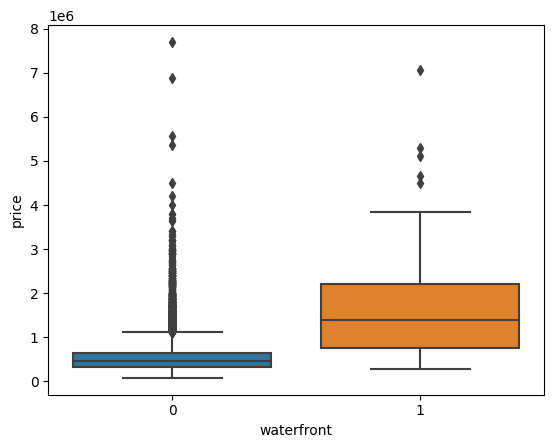

In [ ]:
#4 Producing a plot that can be used to determine whether houses with a waterfront view or without a waterfront view have more price outliers using boxplots in the seaborn library
sns.boxplot(x="waterfront",y="price", data=df)

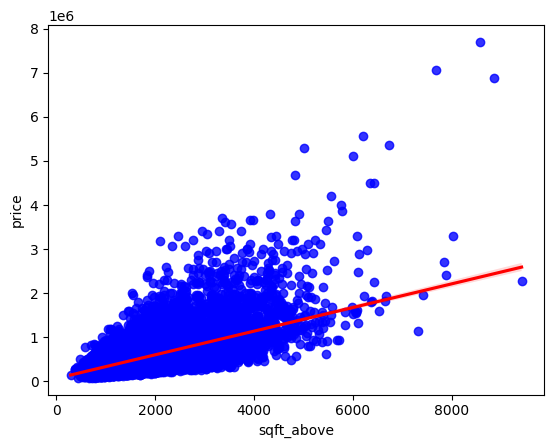

In [ ]:
#5  Determining if the feature sqft_above is negatively or positively correlated with price using the function regplot in the seaborn library
df[['price','sqft_above']].corr()
sns.regplot(x="sqft_above",y="price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

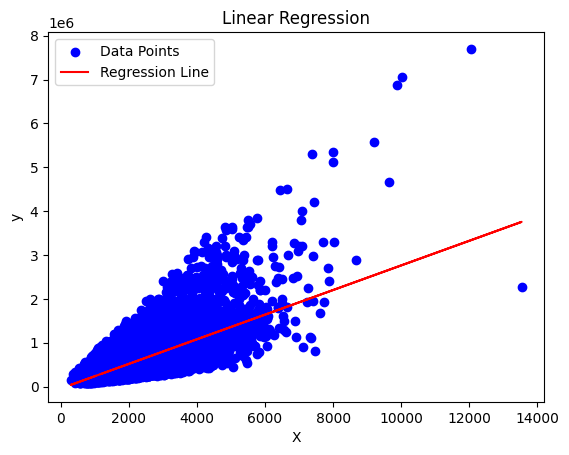

R squared value= 0.4928532179037931


In [ ]:
#6 Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R^2
X= df[['sqft_living']]
y= df[['price']]

model = LinearRegression()
model.fit(X, y)
r2= model.score(X,y)
y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('y')

plt.title('Linear Regression')
plt.legend()
plt.show()

print("R squared value=", r2)

In [ ]:
#7 Fit a linear regression model to predict the 'price' using the list of features:
# "floors"
# "waterfront"
# "lat"
# "bedrooms"
# "sqft_basement"
# "view"
# "bathrooms"
# "sqft_living15"
# "sqft_above"
# "grade"
# "sqft_living"

# Then calculate the R^2
lm= LinearRegression()
X= df_[['floors', 'waterfront', 'lat', 'bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']]
Y= df_[['price']]

lm.fit(X,Y)
Y_= lm.predict(X)

print(lm.intercept_)
print(lm.coef_)
r2_score = r2_score(Y, Y_)
print("R^2 Score:", r2_score)

[-32384071.85823347]
[[-3.11218829e+04  6.06288945e+05  6.72922134e+05 -2.60662531e+04
  -1.25689967e+15  6.70313171e+04 -3.18892682e+03  4.87164995e+00
  -1.25689967e+15  8.20254435e+04  1.25689967e+15]]
R^2 Score: 0.6576722447699446


In [ ]:
#8 Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2

# Split the data into features and target
features = df_[['floors', 'waterfront', 'lat', 'bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']]
target = df_['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the pipeline with polynomial transformation, scaling, and linear regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scale', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)
print(y_pred)

# Calculate the R^2 score
r2_score = r2_score(y_test, y_pred)
print("R^2 Score:", r2_score)


[ 456422.91108937  748256.66108937 1243909.66108937 ...  276385.16108937
  582546.16108937  276272.66108937]
R^2 Score: 0.7113799295567765


In [ ]:
#9 Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data

# Split the data into features and target
features = df_[['floors', 'waterfront', 'lat', 'bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']]
target = df_['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=0.1)

# Train the model using the training data
ridge_model.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred = ridge_model.predict(X_test)
print(y_pred)

# R^2 score using the test data
r2_score_value = r2_score(y_test, y_pred)
print("R^2 score on test data:", r2_score_value)

[ 434226.08626744  760600.85782564 1229124.12785821 ...  403212.691094
  601541.81900215  425158.93681606]
R^2 score on test data: 0.6613982983090939


In [ ]:
#10 Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided

features = df_[['floors', 'waterfront', 'lat', 'bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']]
target = df_['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=0.1)

# Perform second-order polynomial transform on the training data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Perform second-order polynomial transform on the test data
X_test_poly = poly.transform(X_test)

# Create a Ridge Regression object with regularization parameter alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Train the model using the polynomial-transformed training data
ridge_model.fit(X_train_poly, y_train)

# Predict the target variable using the polynomial-transformed test data
y_pred = ridge_model.predict(X_test_poly)

# Calculate the R^2 score using the test data
r2_score_value = r2_score(y_test, y_pred)

print("R^2 score on test data:", r2_score_value)

R^2 score on test data: 0.7000720069028624
